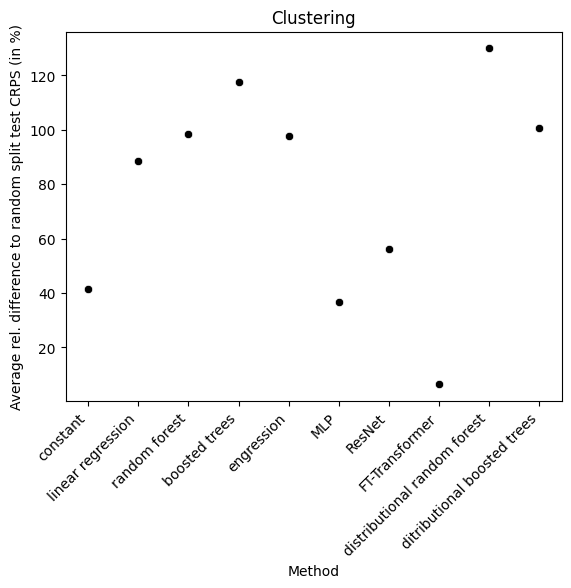

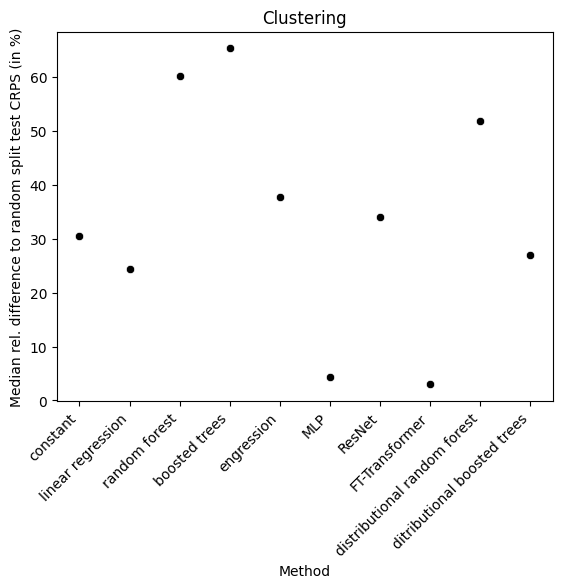

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.transforms import Bbox

directory = r'RESULTS/CLUSTERING'
directory_random = r'RESULTS/RANDOM'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_clustering_crps')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath).iloc[:-2, :]
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        filepath_random = os.path.join(directory_random, task_name + '_random_crps_results.csv')
        table_random = pd.read_csv(filepath_random).iloc[:-1, :]
        CRPS_random = table_random['CRPS']
        CRPS_random = CRPS_random.where(CRPS >= 0, other=float('nan'))
        df[task_name] = (CRPS - CRPS_random) / CRPS_random

df.index=table['Method']
df.index.name = 'Method'
df=100*df
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)
# Reorder the methods
method_order = ['constant', 'linear_regression',  'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)
# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)
result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')
# Removing the ylabel
plt.ylabel('Average rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/clustering_CRPS_only_num_features_EP_VS_IP.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Median', color='black')
# Removing the ylabel
plt.ylabel('Median rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/median_clustering_CRPS_only_num_features_EP_VS_IP.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

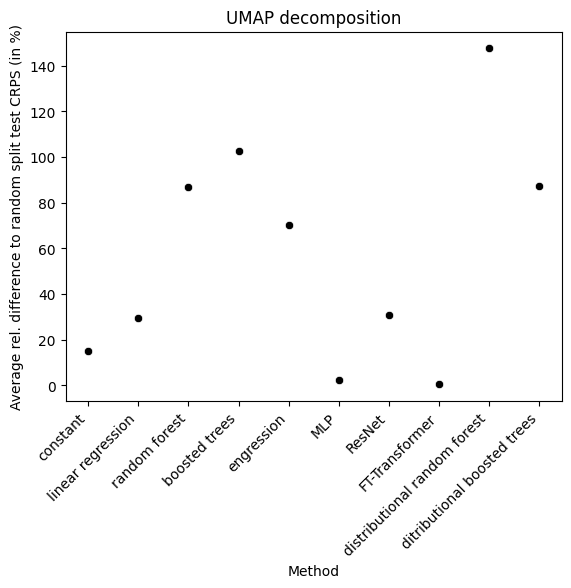

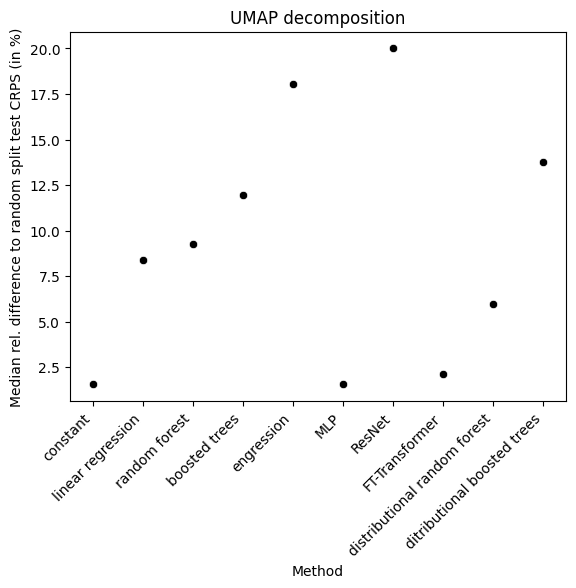

In [25]:
import os
import pandas as pd

directory = r'RESULTS/UMAP_DECOMPOSITION'
directory_random = r'RESULTS/RANDOM'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_umap_decomposition_crps')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath).iloc[:-2, :]
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        filepath_random = os.path.join(directory_random, task_name + '_random_crps_results.csv')
        table_random = pd.read_csv(filepath_random).iloc[:-1, :]
        CRPS_random = table_random['CRPS']
        CRPS_random = CRPS_random.where(CRPS >= 0, other=float('nan'))
        df[task_name] = (CRPS - CRPS_random) / CRPS_random

df.index=table['Method']
df.index.name = 'Method'
df=100*df
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)
# Reorder the methods
method_order = ['constant', 'linear_regression',  'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)
# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)
result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})        

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')
# Removing the ylabel
plt.ylabel('Average rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/umap_decomposition_CRPS_only_num_features_EP_VS_IP.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Median', color='black')
# Removing the ylabel
plt.ylabel('Median rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/median_umap_decomposition_CRPS_only_num_features_EP_VS_IP.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

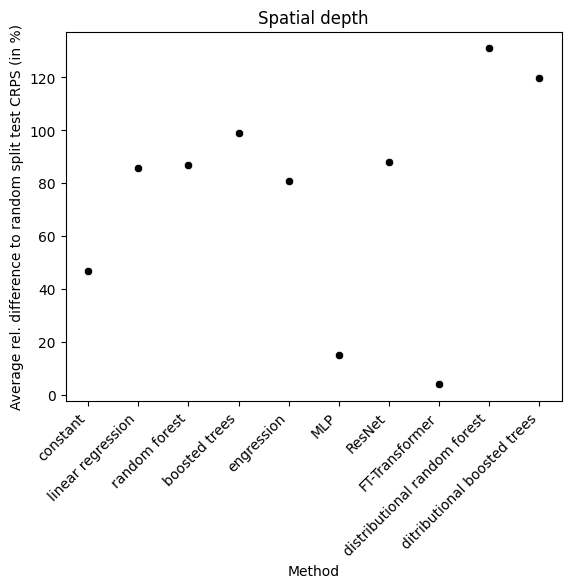

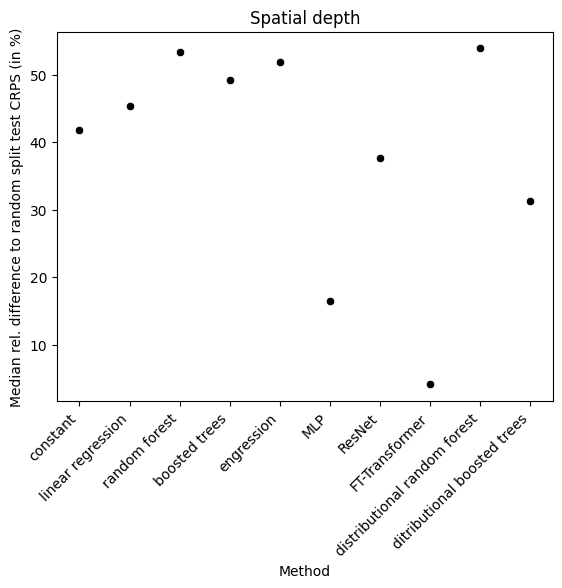

In [26]:
import os
import pandas as pd

directory = r'RESULTS/SPATIAL_DEPTH'
directory_random = r'RESULTS/RANDOM'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_spatial_depth_crps')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath).iloc[:-2, :]
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        lowest_CRPS = np.nanmin(CRPS)
        filepath_random = os.path.join(directory_random, task_name + '_random_crps_results.csv')
        table_random = pd.read_csv(filepath_random).iloc[:-1, :]
        CRPS_random = table_random['CRPS']
        CRPS_random = CRPS_random.where(CRPS >= 0, other=float('nan'))
        df[task_name] = (CRPS - CRPS_random) / CRPS_random

df.index=table['Method']
df.index.name = 'Method'
df=100*df
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)
# Reorder the methods
method_order = ['constant', 'linear_regression',  'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)
# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)
result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')
# Removing the ylabel
plt.ylabel('Average rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('Spatial depth')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/spatial_depth_CRPS_only_num_features_EP_VS_IP.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Median', color='black')
# Removing the ylabel
plt.ylabel('Median rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('Spatial depth')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/median_spatial_depth_CRPS_only_num_features_EP_VS_IP.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

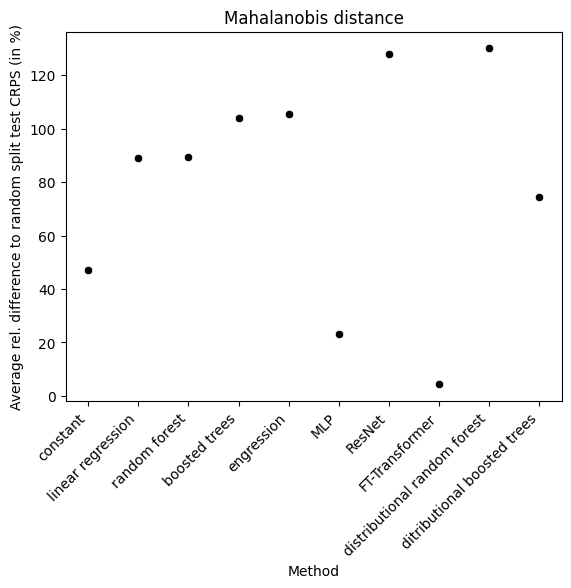

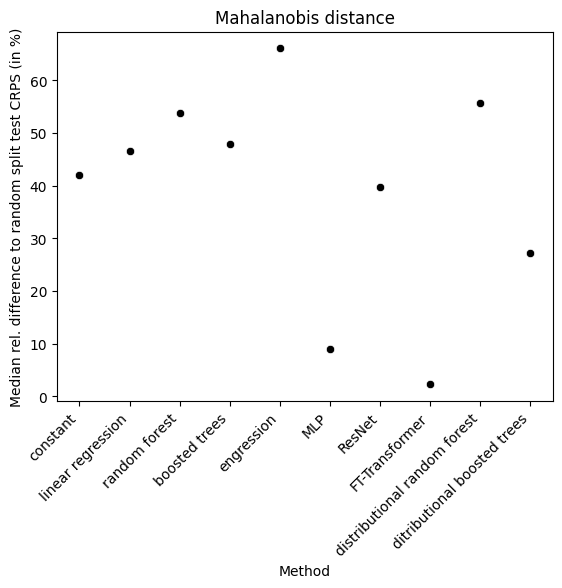

In [27]:
import os
import pandas as pd

directory = r'RESULTS/MAHALANOBIS'
directory_random = r'RESULTS/RANDOM'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_mahalanobis_crps')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath).iloc[:-2, :]
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        filepath_random = os.path.join(directory_random, task_name + '_random_crps_results.csv')
        table_random = pd.read_csv(filepath_random).iloc[:-1, :]
        CRPS_random = table_random['CRPS']
        CRPS_random = CRPS_random.where(CRPS >= 0, other=float('nan'))
        df[task_name] = (CRPS - CRPS_random) / CRPS_random

df.index=table['Method']
df.index.name = 'Method'
df=100*df
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)
# Reorder the methods
method_order = ['constant', 'linear_regression',  'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)
# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)
result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')
# Removing the ylabel
plt.ylabel('Average rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('Mahalanobis distance')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/mahalanobis_CRPS_only_num_features_EP_VS_IP.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Median', color='black')
# Removing the ylabel
plt.ylabel('Median rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('Mahalanobis distance')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/median_mahalanobis_CRPS_only_num_features_EP_VS_IP.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

C:\Users\dalma\AppData\Local\Temp\ipykernel_2868\2608243829.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[task_name] = (crps - CRPS_random) / CRPS_random
C:\Users\dalma\AppData\Local\Temp\ipykernel_2868\2608243829.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[task_name] = (crps - CRPS_random) / CRPS_random
C:\Users\dalma\AppData\Local\Temp\ipykernel_2868\2608243829.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

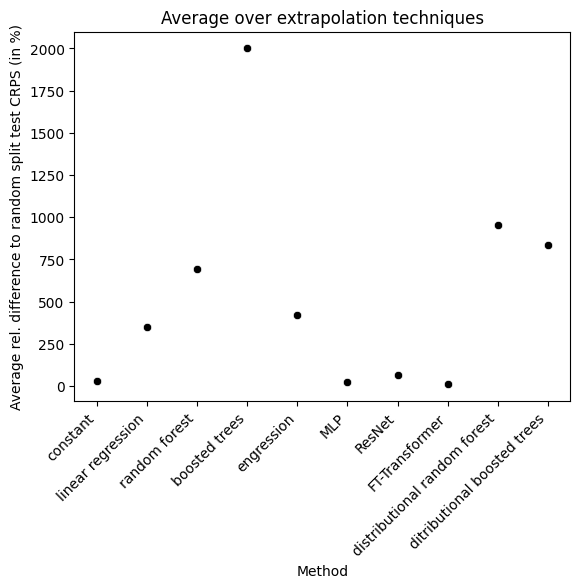

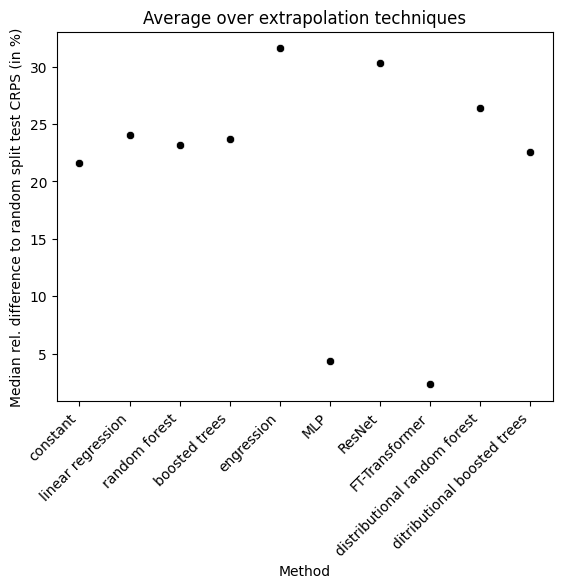

In [28]:
# Plotting the average test accuracy for all extrapolation methods
import os
import pandas as pd
import seaborn as sns

list_directories = [r'RESULTS/CLUSTERING', r'RESULTS/UMAP_DECOMPOSITION', r'RESULTS/SPATIAL_DEPTH', r'RESULTS/MAHALANOBIS', r'RESULTS/GOWER', r'RESULTS/K_MEDOIDS', r'RESULTS/UMAP_DECOMPOSITION_CAT']
df = pd.DataFrame()

for directory in list_directories:
    if directory in [r'RESULTS/CLUSTERING', r'RESULTS/UMAP_DECOMPOSITION', r'RESULTS/SPATIAL_DEPTH', r'RESULTS/MAHALANOBIS']:
        directory_random = r'RESULTS/RANDOM'
        i = 1
    else:
        directory_random = r'RESULTS/RANDOM_CAT'
        i = 2
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            task_name = filename
            task_name_2 = filename.split('_')[0]
            filepath = os.path.join(directory, filename)
            table = pd.read_csv(filepath).iloc[:-2, :] 
            crps = table['CRPS']
            crps = crps.where(crps >= 0, other=float('nan'))
            filepath_random = os.path.join(directory_random, task_name_2 + '_random_crps_results.csv')
            table_random = pd.read_csv(filepath_random).iloc[:-i, :]
            CRPS_random = table_random['CRPS']
            CRPS_random = CRPS_random.where(crps >= 0, other=float('nan'))
            df[task_name] = (crps - CRPS_random) / CRPS_random

df.index=table['Method']
df.index.name = 'Method'
df=100*df
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)
# Reorder the methods
method_order = ['constant', 'linear_regression',  'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)
# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)
result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')
# Removing the ylabel
plt.ylabel('Average rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_CRPS_only_num_features_EP_VS_IP.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Median', color='black')
# Removing the ylabel
plt.ylabel('Median rel. difference to random split test CRPS (in %)')
# Adding labels and title
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')
# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure
# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/median_average_over_extrapolation_techniques_CRPS_only_num_features_EP_VS_IP.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))
plt.show()

In [29]:
result_df

,Method,Mean,Median,Standard Deviation
0,constant,31.682640,21.595006,39.490497
8,linear regression,351.061851,24.074838,2123.720187
7,random forest,694.019244,23.200556,4726.552789
6,boosted trees,1999.420488,23.704053,14923.168655
9,engression,417.332995,31.601899,2657.248264
1,MLP,24.008714,4.336436,77.211730
2,ResNet,62.889634,30.296787,142.172898
3,FT-Transformer,8.881801,2.309640,40.592700
5,distributional random forest,953.682397,26.375418,6537.666989
4,ditributional boosted trees,836.065368,22.595196,5896.481314


In [10]:
result_df

,Method,Mean,Median,Standard Deviation
0,constant,31.682640,0.215950,0.394905
8,linear regression,351.061851,0.240748,21.237202
7,random forest,694.019244,0.232006,47.265528
6,boosted trees,1999.420488,0.237041,149.231687
9,engression,417.332995,0.316019,26.572483
1,MLP,24.008714,0.043364,0.772117
2,ResNet,62.889634,0.302968,1.421729
3,FT-Transformer,3.736079,0.027407,0.164285
5,distributional random forest,953.682397,0.263754,65.376670
4,ditributional boosted trees,836.065368,0.225952,58.964813
